In [1]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
import numpy as np
import librosa.display
import signal
plt.rcParams['figure.figsize'] = (14,4)

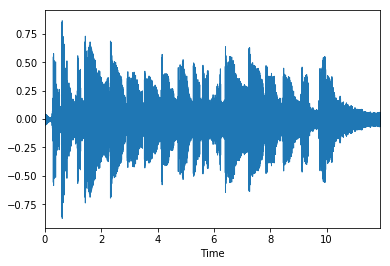

In [3]:
x, fs = librosa.load('laylac.mp3')
#x = x[75*fs:fs*105]
x = x[1*fs:fs*30]
librosa.display.waveplot(x, sr=fs)
#source: http://www.theory.physics.ubc.ca/341-current/sweep.html
IPython.display.Audio(x, rate=fs)


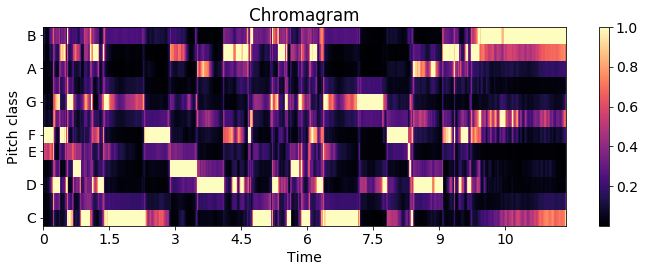

In [5]:
chroma = librosa.feature.chroma_stft(x, fs)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()

plt.title('Chromagram')
plt.tight_layout()

7.196143414834437


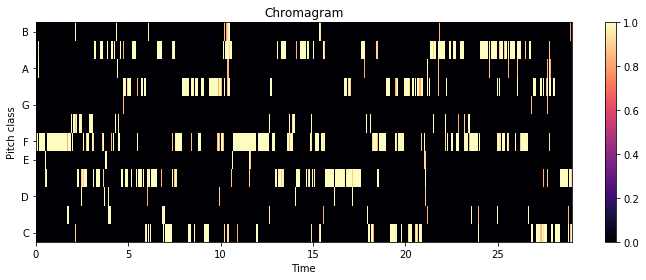

In [79]:
#original audio signal - extract max chroma key only
chroma = librosa.feature.chroma_stft(x, fs)
threshold = 300
m, n = chroma.shape

avg = 0
chroma = chroma.transpose()
m, n = chroma.shape

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg * 2 

print(threshold)

for i in chroma:
    if np.sum(i) < threshold:
        ind = np.where(i == np.max(i))
        max_val = i[ind]#is always 1!
        i[ind] = 0
        
        ind2 = np.where(i == np.max(i))
        i[ind] = 1
        
        if i[ind2] >= 0.8 * max_val:
            i[ind2] = i[ind2]
            pass
        #low_values_flags = i < 1
        low_values_flags = i < 0.8
        
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()        
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

117.45383522727273


<Figure size 576x288 with 0 Axes>

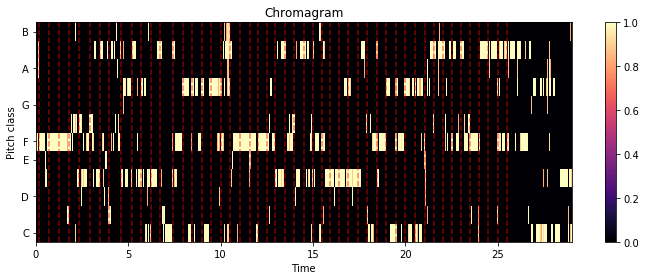

In [80]:
#beat estimation for unfiltered audio

tempo, beats = librosa.beat.beat_track(x, fs)#
print(tempo)
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=fs)

import matplotlib.pyplot as plt
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)
#plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
#plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
#plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 10-second window
#plt.xlim(0, 10)
#plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
#plt.tight_layout()

plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

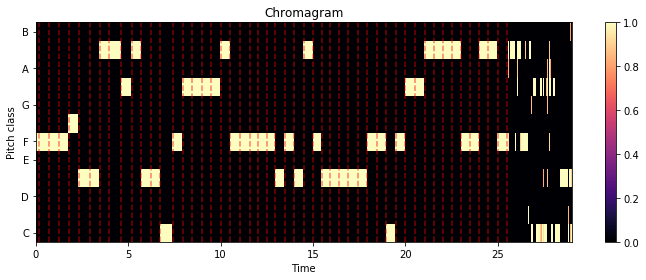

In [81]:
chroma = chroma.transpose()        
prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

for i in beats:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    #print(sum_key)
    #print(chroma[prev_beat:act_beat])
    ind = np.where(sum_key == np.max(sum_key))
    
    #print("debug")
    fill = np.zeros(len(j))
    fill[ind] = 1
    chroma[prev_beat:act_beat] = fill
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")
    
chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()


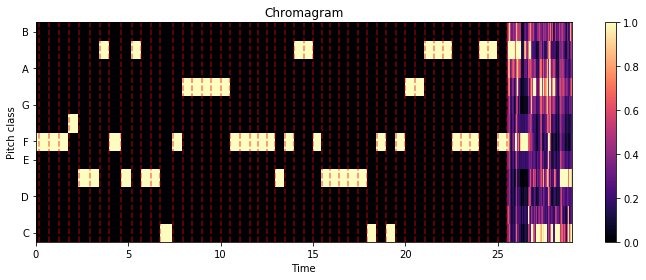

In [82]:
chroma = librosa.feature.chroma_stft(x, fs)
chroma = chroma.transpose()        
prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

for i in beats:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    #print(sum_key)
    #print(chroma[prev_beat:act_beat])
    ind = np.where(sum_key == np.max(sum_key))
    
    #print("debug")
    fill = np.zeros(len(j))
    fill[ind] = 1
    chroma[prev_beat:act_beat] = fill
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")
    
chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
